In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/JobShield_Checkpoint1 /fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
# 3.2. Удаляем полностью пустые строки (на всякий случай)
df = df.dropna(how="all")

# 3.3. Заполняем пропуски пустыми строками в текстовых столбцах
text_cols = ["title", "company_profile", "description", "requirements", "benefits"]

for col in text_cols:
    df[col] = df[col].fillna("")

# 3.4. Создаём объединённый текст full_text
df["full_text"] = (
    df["title"] + " " +
    df["company_profile"] + " " +
    df["description"] + " " +
    df["requirements"] + " " +
    df["benefits"]
)

# 3.5. Удаляем строки, где full_text пустой
df = df[df["full_text"].str.len() > 0]

# 3.6. Добавляем колонку label (дубликат fraudulent)
df["label"] = df["fraudulent"]

# Проверка
df[["full_text", "label"]].head()

,full_text,label
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [ ]:
df["label"].value_counts(), df["label"].value_counts(normalize=True)

(label
 0    17014
 1      866
 Name: count, dtype: int64,
 label
 0    0.951566
 1    0.048434
 Name: proportion, dtype: float64)

Class counts:
label
0    17014
1      866
Name: count, dtype: int64 

Class proportions:
label
0    0.951566
1    0.048434
Name: proportion, dtype: float64 



/tmp/ipython-input-2151101256.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


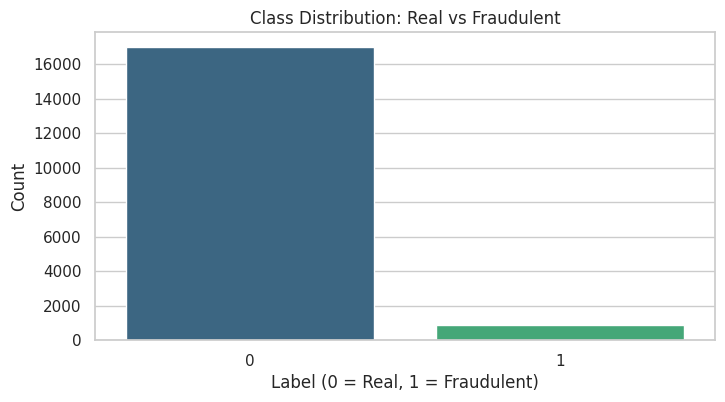

Text length statistics:
count    17880.000000
mean      2670.464094
std       1465.514148
min         18.000000
25%       1595.000000
50%       2522.000000
75%       3475.000000
max      14945.000000
Name: text_length, dtype: float64 



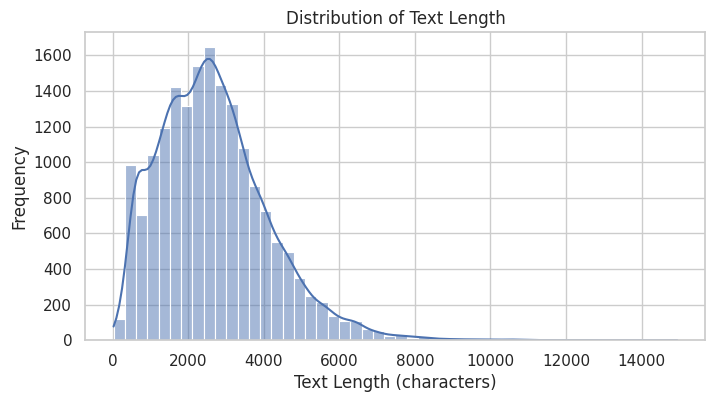

/tmp/ipython-input-2151101256.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="text_length", palette="viridis")


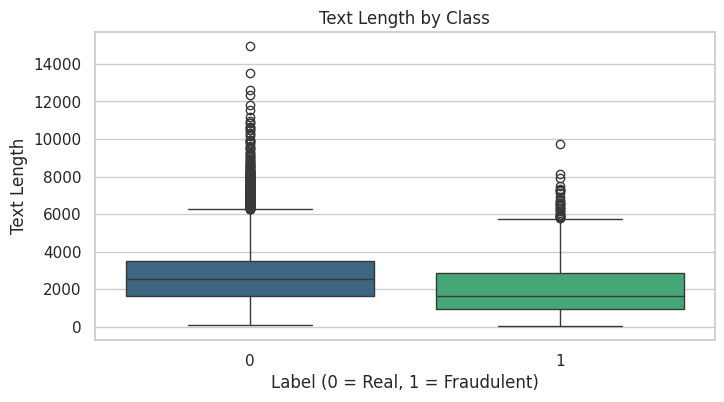

Top 50 TF-IDF words (dataset-wide):
['ability' 'amp' 'based' 'best' 'business' 'client' 'clients'
 'communication' 'company' 'customer' 'customers' 'data' 'design'
 'development' 'environment' 'experience' 'help' 'high' 'including' 'job'
 'knowledge' 'looking' 'management' 'marketing' 'new' 'people' 'position'
 'product' 'products' 'project' 'provide' 'quality' 'required' 'sales'
 'service' 'services' 'skills' 'software' 'solutions' 'strong' 'support'
 'team' 'technical' 'technology' 'time' 'web' 'work' 'working' 'world'
 'years'] 

Top TF-IDF words for fraudulent job posts:
['ability' 'amp' 'business' 'company' 'customer' 'data' 'development'
 'engineering' 'environment' 'experience' 'industry' 'job' 'knowledge'
 'looking' 'management' 'new' 'position' 'products' 'project' 'required'
 'service' 'services' 'skills' 'solutions' 'support' 'team' 'time' 'work'
 'working' 'years'] 

Missing values per column:
job_id                     0
title                      0
location               

In [ ]:
# =====================================================
# EDA — Exploratory Data Analysis for JobShield Project
# =====================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Чтобы графики выглядели лучше
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# ---------------------------
# 4.1. Class distribution
# ---------------------------
print("Class counts:")
print(df["label"].value_counts(), "\n")

print("Class proportions:")
print(df["label"].value_counts(normalize=True), "\n")

sns.countplot(data=df, x="label", palette="viridis")
plt.title("Class Distribution: Real vs Fraudulent")
plt.xlabel("Label (0 = Real, 1 = Fraudulent)")
plt.ylabel("Count")
plt.show()

# ---------------------------
# 4.2. Text length distribution
# ---------------------------
df["text_length"] = df["full_text"].str.len()

print("Text length statistics:")
print(df["text_length"].describe(), "\n")

sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

# ---------------------------
# 4.3. Text length by class
# ---------------------------
sns.boxplot(data=df, x="label", y="text_length", palette="viridis")
plt.title("Text Length by Class")
plt.xlabel("Label (0 = Real, 1 = Fraudulent)")
plt.ylabel("Text Length")
plt.show()

# ---------------------------
# 4.4. Top TF-IDF words for entire dataset
# ---------------------------
vec = TfidfVectorizer(max_features=50, stop_words="english")
vec.fit(df["full_text"])

print("Top 50 TF-IDF words (dataset-wide):")
print(vec.get_feature_names_out(), "\n")

# ---------------------------
# 4.5. TF-IDF words specifically for fraudulent posts
# ---------------------------
fraud_texts = df[df["label"] == 1]["full_text"]

fraud_vec = TfidfVectorizer(max_features=30, stop_words="english")
fraud_vec.fit(fraud_texts)

print("Top TF-IDF words for fraudulent job posts:")
print(fraud_vec.get_feature_names_out(), "\n")

# ---------------------------
# 4.6. Missing values check
# ---------------------------
print("Missing values per column:")
print(df.isna().sum())

In [ ]:
# ===========================================
# STEP 5: Data Preparation for Model Training
# ===========================================

import tensorflow as tf
from sklearn.model_selection import train_test_split

# 5.1. Stratified train/test split
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

print("Train size:", len(train_df))
print("Test size:", len(test_df))
print("Train class distribution:")
print(train_df["label"].value_counts(normalize=True))

# ------------------------------------------------------
# 5.2. TextVectorization layer (tokenization + encoding)
# ------------------------------------------------------
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=30000,               # vocabulary size
    output_sequence_length=300,     # fixed length for CNN
    standardize="lower_and_strip_punctuation"
)

# Adapt vectorizer ONLY on training data
vectorizer.adapt(train_df["full_text"].values)

# ------------------------------------------------------
# 5.3. Vectorize text into numeric tensors
# ------------------------------------------------------
x_train = vectorizer(train_df["full_text"].values)
x_test = vectorizer(test_df["full_text"].values)

y_train = train_df["label"].values
y_test = test_df["label"].values

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Example encoded text:", x_train[0][:20])


Train size: 14304
Test size: 3576
Train class distribution:
label
0    0.951552
1    0.048448
Name: proportion, dtype: float64
x_train shape: (14304, 300)
x_test shape: (3576, 300)
Example encoded text: tf.Tensor(
[ 425  507 1184  819  334 1388  459  391    7 3313    9    4 1304 1117
    5 1624    2 2117  349 3488], shape=(20,), dtype=int64)


In [ ]:
# ===========================================
# STEP 6: Baseline Model — 1D CNN
# ===========================================

import tensorflow as tf
from tensorflow.keras import layers, models

# 6.1. Build the model
model = models.Sequential([
    layers.Embedding(input_dim=30000, output_dim=64),
    layers.Conv1D(64, 5, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------------
# 6.2. Handle imbalance with class weights
# -----------------------------------------------
class_weights = {0: 1., 1: 10.}  # fraudulent boosted

# -----------------------------------------------
# 6.3. Train the model
# -----------------------------------------------
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.8946 - loss: 0.7591 - val_accuracy: 0.9507 - val_loss: 0.1248
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9562 - loss: 0.1784 - val_accuracy: 0.9689 - val_loss: 0.0771
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.9832 - loss: 0.0848 - val_accuracy: 0.9759 - val_loss: 0.0790
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9927 - loss: 0.0328 - val_accuracy: 0.9790 - val_loss: 0.0841
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9959 - loss: 0.0205 - val_accuracy: 0.9780 - val_loss: 0.1054


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(x_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.84      0.76      0.80       173

    accuracy                           0.98      3576
   macro avg       0.91      0.88      0.89      3576
weighted avg       0.98      0.98      0.98      3576

Confusion matrix:
[[3377   26]
 [  41  132]]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

PROJECT_DIR = "/content/drive/MyDrive/JobShield_Checkpoint1"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflowjs

In [3]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/drive/MyDrive/JobShield_Checkpoint1 /fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
text_cols = ["title", "company_profile", "description", "requirements", "benefits"]
for col in text_cols:
    df[col] = df[col].fillna("")

df["full_text"] = (
    df["title"] + " " +
    df["company_profile"] + " " +
    df["description"] + " " +
    df["requirements"] + " " +
    df["benefits"]
)

df = df[df["full_text"].str.len() > 0]
df["label"] = df["fraudulent"]

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=30000,
    output_sequence_length=300,
    standardize="lower_and_strip_punctuation"
)

vectorizer.adapt(train_df["full_text"].values)

x_train = vectorizer(train_df["full_text"].values)
x_test = vectorizer(test_df["full_text"].values)

y_train = train_df["label"].values
y_test = test_df["label"].values

In [14]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Embedding(input_dim=30000, output_dim=64),
    layers.Conv1D(64, 5, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

class_weights = {0: 1., 1: 10.}

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.8334 - loss: 0.7422 - val_accuracy: 0.9497 - val_loss: 0.1097
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9600 - loss: 0.1701 - val_accuracy: 0.9549 - val_loss: 0.1096
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9789 - loss: 0.0755 - val_accuracy: 0.9738 - val_loss: 0.0844
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9942 - loss: 0.0299 - val_accuracy: 0.9706 - val_loss: 0.1020
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.9954 - loss: 0.0195 - val_accuracy: 0.9699 - val_loss: 0.1266


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(x_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.67      0.86      0.75       173

    accuracy                           0.97      3576
   macro avg       0.83      0.92      0.87      3576
weighted avg       0.98      0.97      0.97      3576

Confusion matrix:
[[3331   72]
 [  25  148]]


In [21]:
!ls "/content/drive/MyDrive"

'2HR Analytics marital.csv'
'3HR department employee satisfaction dataset.csv'
'Blockchain Integration in Business Information Systems: Enhancing Data Transparency and Trust.gdoc'
 calculator_tool.xlsm.gsheet
'Colab Notebooks'
'Development of a service to integrate artificial intelligence into the HR department to improve the professional activity of the company.gdoc'
'Development of a service to integrate artificial intelligence into the HR department to improve the professional activity of the company.gslides'
 Figures.gdoc
 finance.gdoc
'Ind. project 1.gdoc'
'JobShield - Browser AI for Detecting Fraudulent Job Postings.gdoc'
 JobShield_Checkpoint1
'Micro-Scale Energy Harvesting Technologies: Enabling Sustainable Power for IoT and Remote Systems.gdoc'
'Micro-Scale Energy Harvesting Technologies.gslides'
 package.json
'Practice5 Daria Gustaya.ipynb'
 Practice5_Egorov_BABDS242.ipynb
 Practice_5_Solution_1_3.ipynb
'Predicting Tsunami Potential After Major Earthquakes.gslides'
'RESEARCH 

In [25]:
model.save("/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_model.keras")

In [26]:
import os
os.listdir("/content/drive/MyDrive/JobShield_Checkpoint1")

['fake_job_postings.csv',
 'JobShield_Model_Preparation.ipynb',
 'jobshield_model.h5',
 'jobshield_tfjs',
 'jobshield_model.keras']

In [28]:
model.export("/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_model")

Saved artifact at '/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136680989596304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136680989597456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136680987445008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136680987445392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136680989597648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136680987446544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136680987445584: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [29]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    "/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_model" \
    "/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_tfjs"

2025-11-28 10:19:23.365437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764325163.404768   16461 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764325163.417000   16461 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764325163.444859   16461 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764325163.444919   16461 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764325163.444932   16461 computation_placer.cc:177] computation placer alr

In [30]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [31]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    "/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_model" \
    "/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_tfjs"

2025-11-28 10:20:52.404683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764325252.489875   16843 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764325252.514045   16843 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764325252.573526   16843 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764325252.573578   16843 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764325252.573588   16843 computation_placer.cc:177] computation placer alr

In [32]:
import os

print(os.listdir("/content/drive/MyDrive/JobShield_Checkpoint1"))
print(os.listdir("/content/drive/MyDrive/JobShield_Checkpoint1/jobshield_tfjs"))

['fake_job_postings.csv', 'JobShield_Model_Preparation.ipynb', 'jobshield_model.h5', 'jobshield_tfjs', 'jobshield_model.keras', 'jobshield_model']
['group1-shard1of2.bin', 'group1-shard2of2.bin', 'model.json']
